# **Data Analysis for the Forest Covertypes Data**

![Image](https://cdn.shopify.com/s/files/1/0326/7189/t/65/assets/pf-85b5b49e--Website-Header-2000px-x-600px.jpg?v=1625226604)

[Image Credit](https://onetreeplanted.org/pages/million-tree-challenge) <br>

In this notebook, the data of **Forest Cover Type Prediction** is analyzed and prepared for developing prediction models. <br>
The data can be downloaded from: <br>
https://www.kaggle.com/competitions/forest-cover-type-prediction/data 

In [145]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps
import os

# to bypass warnings in various dataframe assignments
pd.options.mode.chained_assignment = None

pd.set_option('display.max_columns', 60)
%matplotlib inline


In [3]:
# Loading data
train = pd.read_csv("data/raw/train.csv")
test = pd.read_csv("data/raw/test.csv")

## **1. First Glance at Data:**
In this section, we take a quick look at data, types of features, number of data points, number of missing values, etc. <br>
#### **1.1 First Look:**


In [4]:
# quick look at the train data
train.head()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0   1       2596      51      3                               258   
1   2       2590      56      2                               212   
2   3       2804     139      9                               268   
3   4       2785     155     18                               242   
4   5       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
0                                6279                 1                 0   
1                                6225                 1                 0   
2                                6121                 1                 0   
3                                6211                 1                 0   
4                                6172                 1                 0   

   Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
0                 0                 0           0           0           0   
1                 0                 0           0           0           0   
2                 0                 0           0           0           0   
3                 0                 0           0           0           0   
4                 0                 0           0           0           0   

   Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            1            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type20  Soil_Type21  Soil_Type22  Soil_Type23  Soil_Type24  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  \
0            0            0            0            0            1   
1            0            0            0            0            1  

In [5]:
# quick look at the test data
test.head()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0  15121       2680     354     14                                 0   
1  15122       2683       0     13                                 0   
2  15123       2713      16     15                                 0   
3  15124       2709      24     17                                 0   
4  15125       2706      29     19                                 0   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                             2684   
1                               0                             2654   
2                               0                             2980   
3                               0                             2950   
4                               0                             2920   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            196             214            156   
1            201             216            152   
2            206             208            137   
3            208             201            125   
4            210             195            115   

   Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
0                                6645                 1                 0   
1                                6675                 1                 0   
2                                6344                 1                 0   
3                                6374                 1                 0   
4                                6404                 1                 0   

   Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
0                 0                 0           0           0           0   
1                 0                 0           0           0           0   
2                 0                 0           0           0           0   
3                 0                 0           0           0           0   
4                 0                 0           0           0           0   

   Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type20  Soil_Type21  Soil_Type22  Soil_Type23  Soil_Type24  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  \
0            0            0            0            0            1   
1            0            0            0            0

#### **1.2 Data Types:**

In [6]:
# check data types in the train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [7]:
# check data types in the test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565892 entries, 0 to 565891
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Id                                  565892 non-null  int64
 1   Elevation                           565892 non-null  int64
 2   Aspect                              565892 non-null  int64
 3   Slope                               565892 non-null  int64
 4   Horizontal_Distance_To_Hydrology    565892 non-null  int64
 5   Vertical_Distance_To_Hydrology      565892 non-null  int64
 6   Horizontal_Distance_To_Roadways     565892 non-null  int64
 7   Hillshade_9am                       565892 non-null  int64
 8   Hillshade_Noon                      565892 non-null  int64
 9   Hillshade_3pm                       565892 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  565892 non-null  int64
 11  Wilderness_Area1                    565892 non-null 

#### **1.3 Missing Values:**

In [54]:
# checking the number of null (missing) values in the train dataset
pd.DataFrame(train.isnull().sum(), columns=['Number of missing values'])

Number of missing values
Id                                                         0
Elevation                                                  0
Aspect                                                     0
Slope                                                      0
Horizontal_Distance_To_Hydrology                           0
Vertical_Distance_To_Hydrology                             0
Horizontal_Distance_To_Roadways                            0
Hillshade_9am                                              0
Hillshade_Noon                                             0
Hillshade_3pm                                              0
Horizontal_Distance_To_Fire_Points                         0
Wilderness_Area1                                           0
Wilderness_Area2                                           0
Wilderness_Area3                                           0
Wilderness_Area4                                           0
Soil_Type1                                                 0
Soil_Type2                                                 0
Soil_Type3                                                 0
Soil_Type4                                                 0
Soil_Type5                                                 0
Soil_Type6                                                 0
Soil_Type7                                                 0
Soil_Type8                                                 0
Soil_Type9                                                 0
Soil_Type10                                                0
Soil_Type11                                                0
Soil_Type12                                                0
Soil_Type13                                                0
Soil_Type14                                                0
Soil_Type15                                                0
Soil_Type16                                                0
Soil_Type17                                                0
Soil_Type18                                                0
Soil_Type19                                                0
Soil_Type20                                                0
Soil_Type21                                                0
Soil_Type22                                                0
Soil_Type23                                                0
Soil_Type24                                                0
Soil_Type25                                                0
Soil_Type26                                                0
Soil_Type27                                                0
Soil_Type28                                                0
Soil_Type29                                                0
Soil_Type30                                                0
Soil_Type31                                                0
Soil_Type32                                                0
Soil_Type33                                                0
Soil_Type34                                                0
Soil_Type35                                                0
Soil_Type36                                                0
Soil_Type37                                                0
Soil_Type38                                                0
Soil_Type39                                                0
Soil_Type40                                                0
Cover_Type                                                 0

In [55]:
# checking the number of null values in the test dataset
pd.DataFrame(test.isnull().sum(), columns=['Number of missing values'])

Number of missing values
Id                                                         0
Elevation                                                  0
Aspect                                                     0
Slope                                                      0
Horizontal_Distance_To_Hydrology                           0
Vertical_Distance_To_Hydrology                             0
Horizontal_Distance_To_Roadways                            0
Hillshade_9am                                              0
Hillshade_Noon                                             0
Hillshade_3pm                                              0
Horizontal_Distance_To_Fire_Points                         0
Wilderness_Area1                                           0
Wilderness_Area2                                           0
Wilderness_Area3                                           0
Wilderness_Area4                                           0
Soil_Type1                                                 0
Soil_Type2                                                 0
Soil_Type3                                                 0
Soil_Type4                                                 0
Soil_Type5                                                 0
Soil_Type6                                                 0
Soil_Type7                                                 0
Soil_Type8                                                 0
Soil_Type9                                                 0
Soil_Type10                                                0
Soil_Type11                                                0
Soil_Type12                                                0
Soil_Type13                                                0
Soil_Type14                                                0
Soil_Type15                                                0
Soil_Type16                                                0
Soil_Type17                                                0
Soil_Type18                                                0
Soil_Type19                                                0
Soil_Type20                                                0
Soil_Type21                                                0
Soil_Type22                                                0
Soil_Type23                                                0
Soil_Type24                                                0
Soil_Type25                                                0
Soil_Type26                                                0
Soil_Type27                                                0
Soil_Type28                                                0
Soil_Type29                                                0
Soil_Type30                                                0
Soil_Type31                                                0
Soil_Type32                                                0
Soil_Type33                                                0
Soil_Type34                                                0
Soil_Type35                                                0
Soil_Type36                                                0
Soil_Type37                                                0
Soil_Type38                                                0
Soil_Type39                                                0
Soil_Type40                                                0

**Note: There is no missing value in the train and test sets.**

#### **1.4 Unique Values:**

In [52]:
# checking the number of unique values in the train dataset
pd.DataFrame(train.nunique(), columns=['Unique Values'])

Unique Values
Id                                          15120
Elevation                                    1665
Aspect                                        361
Slope                                          52
Horizontal_Distance_To_Hydrology              400
Vertical_Distance_To_Hydrology                423
Horizontal_Distance_To_Roadways              3250
Hillshade_9am                                 176
Hillshade_Noon                                141
Hillshade_3pm                                 247
Horizontal_Distance_To_Fire_Points           2710
Wilderness_Area1                                2
Wilderness_Area2                                2
Wilderness_Area3                                2
Wilderness_Area4                                2
Soil_Type1                                      2
Soil_Type2                                      2
Soil_Type3                                      2
Soil_Type4                                      2
Soil_Type5                                      2
Soil_Type6                                      2
Soil_Type7                                      1
Soil_Type8                                      2
Soil_Type9                                      2
Soil_Type10                                     2
Soil_Type11                                     2
Soil_Type12                                     2
Soil_Type13                                     2
Soil_Type14                                     2
Soil_Type15                                     1
Soil_Type16                                     2
Soil_Type17                                     2
Soil_Type18                                     2
Soil_Type19                                     2
Soil_Type20                                     2
Soil_Type21                                     2
Soil_Type22                                     2
Soil_Type23                                     2
Soil_Type24                                     2
Soil_Type25                                     2
Soil_Type26                                     2
Soil_Type27                                     2
Soil_Type28                                     2
Soil_Type29                                     2
Soil_Type30                                     2
Soil_Type31                                     2
Soil_Type32                                     2
Soil_Type33                                     2
Soil_Type34                                     2
Soil_Type35                                     2
Soil_Type36                                     2
Soil_Type37                                     2
Soil_Type38                                     2
Soil_Type39                                     2
Soil_Type40                                     2
Cover_Type                                      7

In [53]:
# checking the number of unique values in the test dataset
pd.DataFrame(test.nunique(), columns=['Unique Values'])

Unique Values
Id                                         565892
Elevation                                    1974
Aspect                                        361
Slope                                          67
Horizontal_Distance_To_Hydrology              551
Vertical_Distance_To_Hydrology                700
Horizontal_Distance_To_Roadways              5785
Hillshade_9am                                 207
Hillshade_Noon                                185
Hillshade_3pm                                 255
Horizontal_Distance_To_Fire_Points           5826
Wilderness_Area1                                2
Wilderness_Area2                                2
Wilderness_Area3                                2
Wilderness_Area4                                2
Soil_Type1                                      2
Soil_Type2                                      2
Soil_Type3                                      2
Soil_Type4                                      2
Soil_Type5                                      2
Soil_Type6                                      2
Soil_Type7                                      2
Soil_Type8                                      2
Soil_Type9                                      2
Soil_Type10                                     2
Soil_Type11                                     2
Soil_Type12                                     2
Soil_Type13                                     2
Soil_Type14                                     2
Soil_Type15                                     2
Soil_Type16                                     2
Soil_Type17                                     2
Soil_Type18                                     2
Soil_Type19                                     2
Soil_Type20                                     2
Soil_Type21                                     2
Soil_Type22                                     2
Soil_Type23                                     2
Soil_Type24                                     2
Soil_Type25                                     2
Soil_Type26                                     2
Soil_Type27                                     2
Soil_Type28                                     2
Soil_Type29                                     2
Soil_Type30                                     2
Soil_Type31                                     2
Soil_Type32                                     2
Soil_Type33                                     2
Soil_Type34                                     2
Soil_Type35                                     2
Soil_Type36                                     2
Soil_Type37                                     2
Soil_Type38                                     2
Soil_Type39                                     2
Soil_Type40                                     2

**Note: It seems that Wilderness Areas and Soil Types are one hot encoded.** <br>
We make sure about it in the following by summing up all the values of the features for each data point:


In [12]:
# checking if Wilderness_Area is one hot encoded
pd.DataFrame(train['Wilderness_Area1'] + train['Wilderness_Area2'] + train['Wilderness_Area3'] + train['Wilderness_Area4']).nunique()

0    1
dtype: int64

In [13]:
# checking if Soil_Type is one hot encoded
pd.DataFrame(train['Soil_Type1'] + train['Soil_Type2'] + train['Soil_Type3'] + train['Soil_Type4'] + train['Soil_Type5'] + train['Soil_Type6'] + train['Soil_Type7'] + train['Soil_Type8'] + train['Soil_Type9'] + train['Soil_Type10'] + train['Soil_Type11'] + train['Soil_Type12'] + train['Soil_Type13'] + train['Soil_Type14'] + train['Soil_Type15'] + train['Soil_Type16'] + train['Soil_Type17'] + train['Soil_Type18'] + train['Soil_Type19'] + train['Soil_Type20'] + train['Soil_Type21'] + train['Soil_Type22'] + train['Soil_Type23'] + train['Soil_Type24'] + train['Soil_Type25'] + train['Soil_Type26'] + train['Soil_Type27'] + train['Soil_Type28'] + train['Soil_Type29'] + train['Soil_Type30'] + train['Soil_Type31'] + train['Soil_Type32'] + train['Soil_Type33'] + train['Soil_Type34'] + train['Soil_Type35'] + train['Soil_Type36'] + train['Soil_Type37'] + train['Soil_Type38'] + train['Soil_Type39'] + train['Soil_Type40']).nunique()

0    1
dtype: int64

Since the above outputs do not include 2 or more, the Wilderness Areas and Soil Types features are one hot encoded.

#### **1.5 General Statistics:**

In [14]:
# Checking some statistics of the train dataset
train.describe().round(2)

Id  Elevation    Aspect     Slope  \
count  15120.00   15120.00  15120.00  15120.00   
mean    7560.50    2749.32    156.68     16.50   
std     4364.91     417.68    110.09      8.45   
min        1.00    1863.00      0.00      0.00   
25%     3780.75    2376.00     65.00     10.00   
50%     7560.50    2752.00    126.00     15.00   
75%    11340.25    3104.00    261.00     22.00   
max    15120.00    3849.00    360.00     52.00   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                          15120.00                        15120.00   
mean                             227.20                           51.08   
std                              210.08                           61.24   
min                                0.00                         -146.00   
25%                               67.00                            5.00   
50%                              180.00                           32.00   
75%                              330.00                           79.00   
max                             1343.00                          554.00   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                         15120.00       15120.00        15120.00   
mean                           1714.02         212.70          218.97   
std                            1325.07          30.56           22.80   
min                               0.00           0.00           99.00   
25%                             764.00         196.00          207.00   
50%                            1316.00         220.00          223.00   
75%                            2270.00         235.00          235.00   
max                            6890.00         254.00          254.00   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  Wilderness_Area1  \
count       15120.00                            15120.00          15120.00   
mean          135.09                             1511.15              0.24   
std            45.90                             1099.94              0.43   
min             0.00                                0.00              0.00   
25%           106.00                              730.00              0.00   
50%           138.00                             1256.00              0.00   
75%           167.00                             1988.25              0.00   
max           248.00                             6993.00              1.00   

       Wilderness_Area2  Wilderness_Area3  Wilderness_Area4  Soil_Type1  \
count          15120.00          15120.00          15120.00    15120.00   
mean               0.03              0.42              0.31        0.02   
std                0.18              0.49              0.46        0.15   
min                0.00              0.00              0.00        0.00   
25%                0.00              0.00              0.00        0.00   
50%                0.00              0.00              0.00        0.00   
75%                0.00              1.00              1.00        0.00   
max                1.00              1.00              1.00        1.00   

       Soil_Type2  Soil_Type3  Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  \
count    15120.00    15120.00    15120.00    15120.00    15120.00     15120.0   
mean         0.04        0.06        0.06        0.01        0.04         0.0   
std          0.20        0.24        0.23        0.10        0.20         0.0   
min          0.00        0.00        0.00        0.00        0.00         0.0   
25%          0.00        0.00        0.00        0.00        0.00         0.0   
50%          0.00        0.00        0.00        0.00        0.00         0.0   
75%          0.00        0.00        0.00        0.00        0.00         0.0   
max          1.00        1.00        1.00        1.00        1.00         0.0   

       Soil_Type8  Soil_Type9  Soil_Type10  Soil_Type11  Soil_Type12  \
count    15120.00    15120.00     15120.00     

In [15]:
# Checking some statistics of the test dataset
test.describe().round(2)

Id  Elevation     Aspect      Slope  \
count  565892.00  565892.00  565892.00  565892.00   
mean   298066.50    2964.98     155.63      14.04   
std    163359.09     273.16     111.96       7.45   
min     15121.00    1859.00       0.00       0.00   
25%    156593.75    2818.00      58.00       9.00   
50%    298066.50    2999.00     127.00      13.00   
75%    439539.25    3164.00     260.00      18.00   
max    581012.00    3858.00     360.00      66.00   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                         565892.00                       565892.00   
mean                             270.56                           46.29   
std                              212.50                           58.21   
min                                0.00                         -173.00   
25%                              108.00                            7.00   
50%                              228.00                           29.00   
75%                              390.00                           69.00   
max                             1397.00                          601.00   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                        565892.00      565892.00       565892.00   
mean                           2367.14         212.13          223.44   
std                            1561.48          26.66           19.67   
min                               0.00           0.00            0.00   
25%                            1116.00         198.00          213.00   
50%                            2018.00         218.00          226.00   
75%                            3349.00         231.00          237.00   
max                            7117.00         254.00          254.00   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  Wilderness_Area1  \
count      565892.00                           565892.00         565892.00   
mean          142.73                             1992.83              0.45   
std            38.03                             1327.40              0.50   
min             0.00                                0.00              0.00   
25%           119.00                             1034.00              0.00   
50%           143.00                             1723.00              0.00   
75%           168.00                             2561.00              1.00   
max           254.00                             7173.00              1.00   

       Wilderness_Area2  Wilderness_Area3  Wilderness_Area4  Soil_Type1  \
count         565892.00         565892.00         565892.00   565892.00   
mean               0.05              0.44              0.06        0.00   
std                0.22              0.50              0.23        0.07   
min                0.00              0.00              0.00        0.00   
25%                0.00              0.00              0.00        0.00   
50%                0.00              0.00              0.00        0.00   
75%                0.00              1.00              0.00        0.00   
max                1.00              1.00              1.00        1.00   

       Soil_Type2  Soil_Type3  Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  \
count   565892.00   565892.00   565892.00   565892.00   565892.00   565892.00   
mean         0.01        0.01        0.02        0.00        0.01        0.00   
std          0.11        0.08        0.14        0.05        0.10        0.01   
min          0.00        0.00        0.00        0.00        0.00        0.00   
25%          0.00        0.00        0.00        0.00        0.00        0.00   
50%          0.00        0.00        0.00        0.00        0.00        0.00   
75%          0.00        0.00        0.00        0.00        0.00        0.00   
max          1.00        1.00        1.00        1.00        1.00        1.00   

       Soil_Type8  Soil_Type9  Soil_Type10  Soil_Type11  Soil_Type12  \
count   565892.00   5

## **2. Anamoly Detection:**
In this section, we try to find anomolies (as data points that differ largely from the norm of the data) in the `train` set and remove them. This is performed only on the continuous features.

<AxesSubplot:>

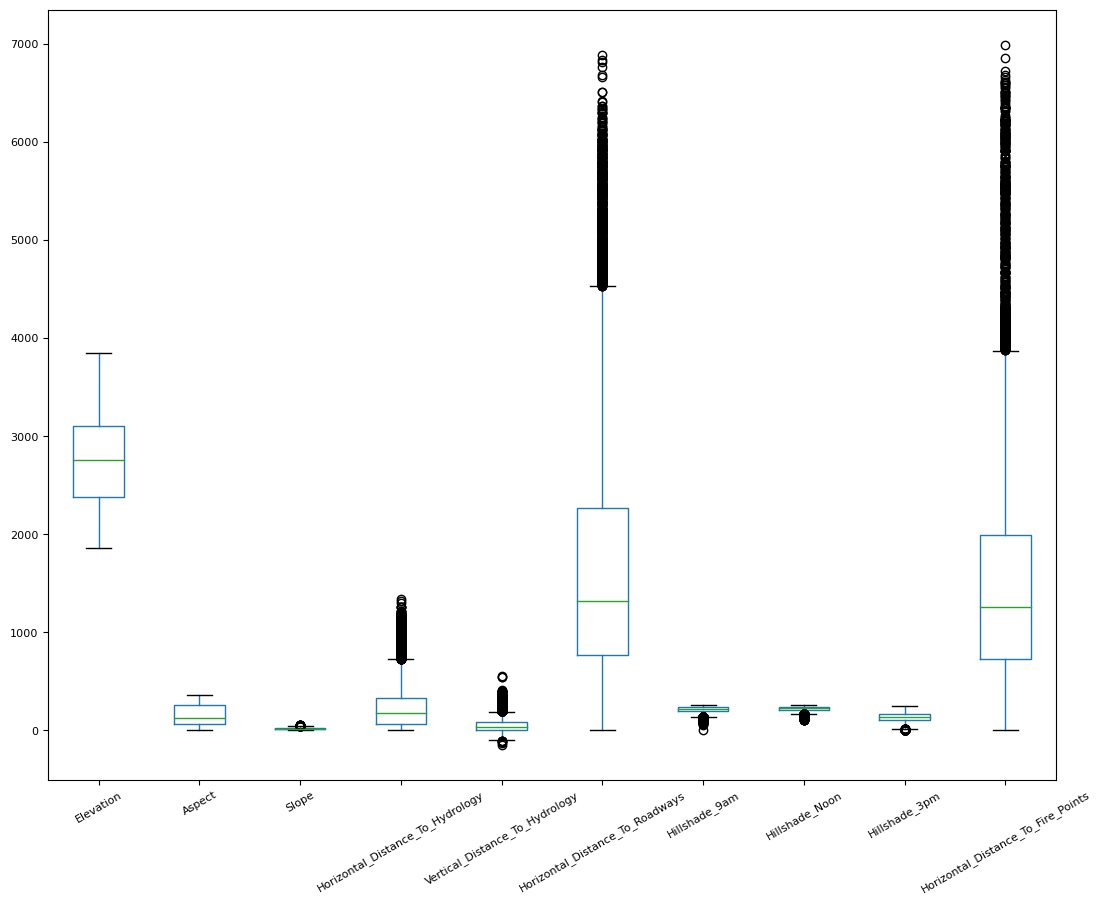

In [16]:
# checking for outliers using box plots in the train dataset (for non-binary columns)
cols = ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points']
train[cols].boxplot(figsize=(13, 10), grid=False, rot=30, fontsize=8)

Defining a function for detecting the outliers based on the Box-Jenkins definition: 

In [17]:
def outlier_detection(df, col_name):

    quartile1 = np.percentile(np.array(df[col_name].tolist()), 25) # 25th percentile
    quartile3 = np.percentile(np.array(df[col_name].tolist()), 75) # 75th percentile
    IQR = quartile3 - quartile1 # Interquartile range
                      
    limit_upper = quartile3 + (3 * IQR)
    limit_lower = quartile1 - (3 * IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < limit_lower) | (value > limit_upper):
            outlier_count += 1
    return outlier_count, limit_upper, limit_lower

In [18]:
# checking for outliers in the train dataset (for non-binary columns)
for col in cols:
    print("Outlier count for column {} is {}".format(col, outlier_detection(train, col)[0]))

Outlier count for column Elevation is 0
Outlier count for column Aspect is 0
Outlier count for column Slope is 0
Outlier count for column Horizontal_Distance_To_Hydrology is 53
Outlier count for column Vertical_Distance_To_Hydrology is 49
Outlier count for column Horizontal_Distance_To_Roadways is 3
Outlier count for column Hillshade_9am is 7
Outlier count for column Hillshade_Noon is 20
Outlier count for column Hillshade_3pm is 0
Outlier count for column Horizontal_Distance_To_Fire_Points is 132


Removing data points with outliers considering the outlier detection based on the column with the highest number of outliers:

In [27]:
# removing outliers from the train dataset (only considering Horizontal_Distance_To_Fire_Points column)
cols = ['Horizontal_Distance_To_Fire_Points']
for col in cols:
    train_mod = train[(train[col] <= outlier_detection(train, col)[1]) & (train[col] >= outlier_detection(train, col)[2])]

train_mod.reset_index(drop=True, inplace=True)
train_mod.shape

(14988, 56)

**Note: `train_mod` is the modified train dataset.**

## **3. Visualization of Relationships:**

**Note: What is kernel density estimation (KDE)?** <br>
A histogram aims to approximate the underlying probability density function that generated the data by binning and counting observations. Kernel density estimation (KDE) presents a different solution to the same problem. Rather than using discrete bins, a KDE plot smooths the observations with a Gaussian kernel, producing a continuous density estimate. <br>
More in: https://seaborn.pydata.org/tutorial/distributions.html#tutorial-kde


#### **3.1 Distribution of Cover Types (Target):**

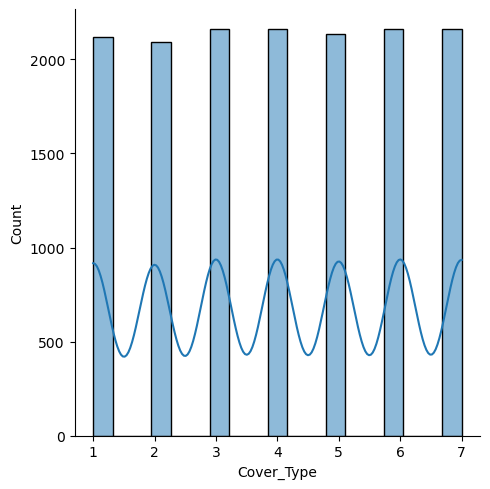

In [28]:
# distribution of the target variable
sns.displot(data=train_mod, x="Cover_Type", kde=True)


In [29]:
# checking the number of each label in the train dataset for target variable
train_mod['Cover_Type'].value_counts()

7    2160
3    2160
6    2160
4    2160
5    2135
1    2119
2    2094
Name: Cover_Type, dtype: int64

As can be seen, the classes are almost equally distributed and the target is balanced.

#### **3.2 Distribution of Target for Each Wilderness Area:**

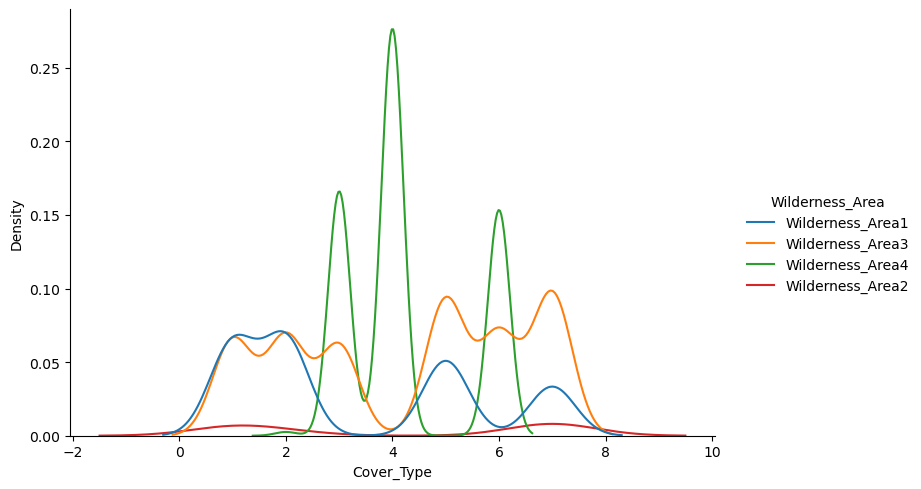

In [34]:
# converting one hot encoded Soil_Type to a single column of type string
train_mod['Wilderness_Area'] = (train_mod.iloc[:, 11:15] == 1).idxmax(1).values
# plotting the distribution of the target variable with respect to the Wilderness_Area
sns.displot(data=train_mod, x="Cover_Type", hue="Wilderness_Area", kind="kde", height=5, aspect=1.5)

It shows that Wilderness Areas can be important predictors since the distributions of Cover Types are very different in different Areas. <br>
It might be even probable that we decide to develope separate models for each Wilderness Areas to improve the prediction accuracy.


#### **3.3 Relationship Between Soil Types and Cover Types For Each Wilderness Area:**

In [38]:
# converting one hot encoded Soil_Type to a single column of type int (Soil_Type_code)
train_mod['Soil_Type'] = (train_mod.iloc[:, 15:55] == 1).idxmax(1).values
train_mod['Soil_Type_code'] = train_mod['Soil_Type'].str.replace('Soil_Type', '').astype(int)

# checking the number of each label in the train dataset for Soil_Type
train_mod['Soil_Type_code'].value_counts()

10    2142
29    1232
3      962
4      843
23     757
38     728
30     709
32     690
39     657
6      650
2      623
33     616
17     612
13     476
40     459
11     406
1      355
22     345
31     332
24     257
12     191
14     169
5      165
20     126
16     108
35     102
18      58
26      54
19      46
37      34
34      22
21      16
27      15
9       10
36      10
28       9
8        1
25       1
Name: Soil_Type_code, dtype: int64

As can be seen, some soil times are rare while some are very common.

We check the distribution of `Soil_Type_code` based on `Cover_Type` for each Wilderness Area:

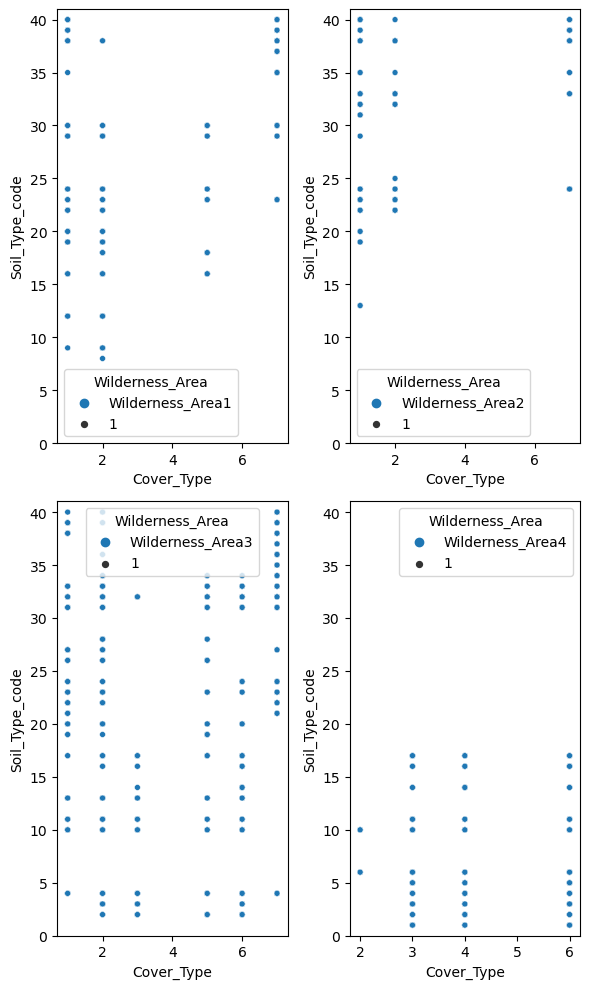

In [50]:
# scatter plot of Soil_Type_code vs Cover_Type for each wilderness area
fig, ax = plt.subplots(2, 2, figsize=(6, 10))
A = train_mod[train_mod['Wilderness_Area']=='Wilderness_Area1']
B = train_mod[train_mod['Wilderness_Area']=='Wilderness_Area2']
C = train_mod[train_mod['Wilderness_Area']=='Wilderness_Area3']
D = train_mod[train_mod['Wilderness_Area']=='Wilderness_Area4']
sns.scatterplot(data=A, x="Cover_Type", y="Soil_Type_code", hue="Wilderness_Area", ax=ax[0, 0], size=1)
sns.scatterplot(data=B, x="Cover_Type", y="Soil_Type_code", hue="Wilderness_Area", ax=ax[0, 1], size=1)
sns.scatterplot(data=C, x="Cover_Type", y="Soil_Type_code", hue="Wilderness_Area", ax=ax[1, 0], size=1)
sns.scatterplot(data=D, x="Cover_Type", y="Soil_Type_code", hue="Wilderness_Area", ax=ax[1, 1], size=1)

# seting range of y axis from 0 to 41
ax[0, 0].set_ylim(0, 41)
ax[0, 1].set_ylim(0, 41)
ax[1, 0].set_ylim(0, 41)
ax[1, 1].set_ylim(0, 41)

plt.tight_layout()

As can be seen in the above figure:

**Area vs Soil:**
* In Area 1: only the first 7 types of soil do not exist and the other types can be found there.
* In Area 2: The first 21 types of soil are not common (only 3 data points).
* In Area 3: Almost all types of soil can be found (except soil types 5 to 9).
* In Area 4: Soil types 18 and above do not exist.

**Area vs Cover:**
* In Area 1: cover types 1 and 2 are very common and cover types 3, 4, and 6 are very rare.
* In Area 2: only cover types 1, 2, and 7 can be found.
* In Area 3: cover type 4 cannot be found.
* In Area 4: cover types 3, 4, and 6 are dominant. Cover types 1, 5, and 7 do not exist.

**Cover vs Soil:**
* Cover Type 1: can be found in almost all soil types.
* Cover Type 2: can be found in almost all soil types.
* Cover Type 3: can be found in soil types 1 to 17.
* Cover Type 4: can be found in soil types 1 to 17.
* Cover Type 5: can be found in soil types 1 to 35.
* Cover Type 6: can be found in soil types 1 to 35.
* Cover Type 7: can be found in soil types 20 to 40.

#### **3.4 Relationships Between Continuous Features:**

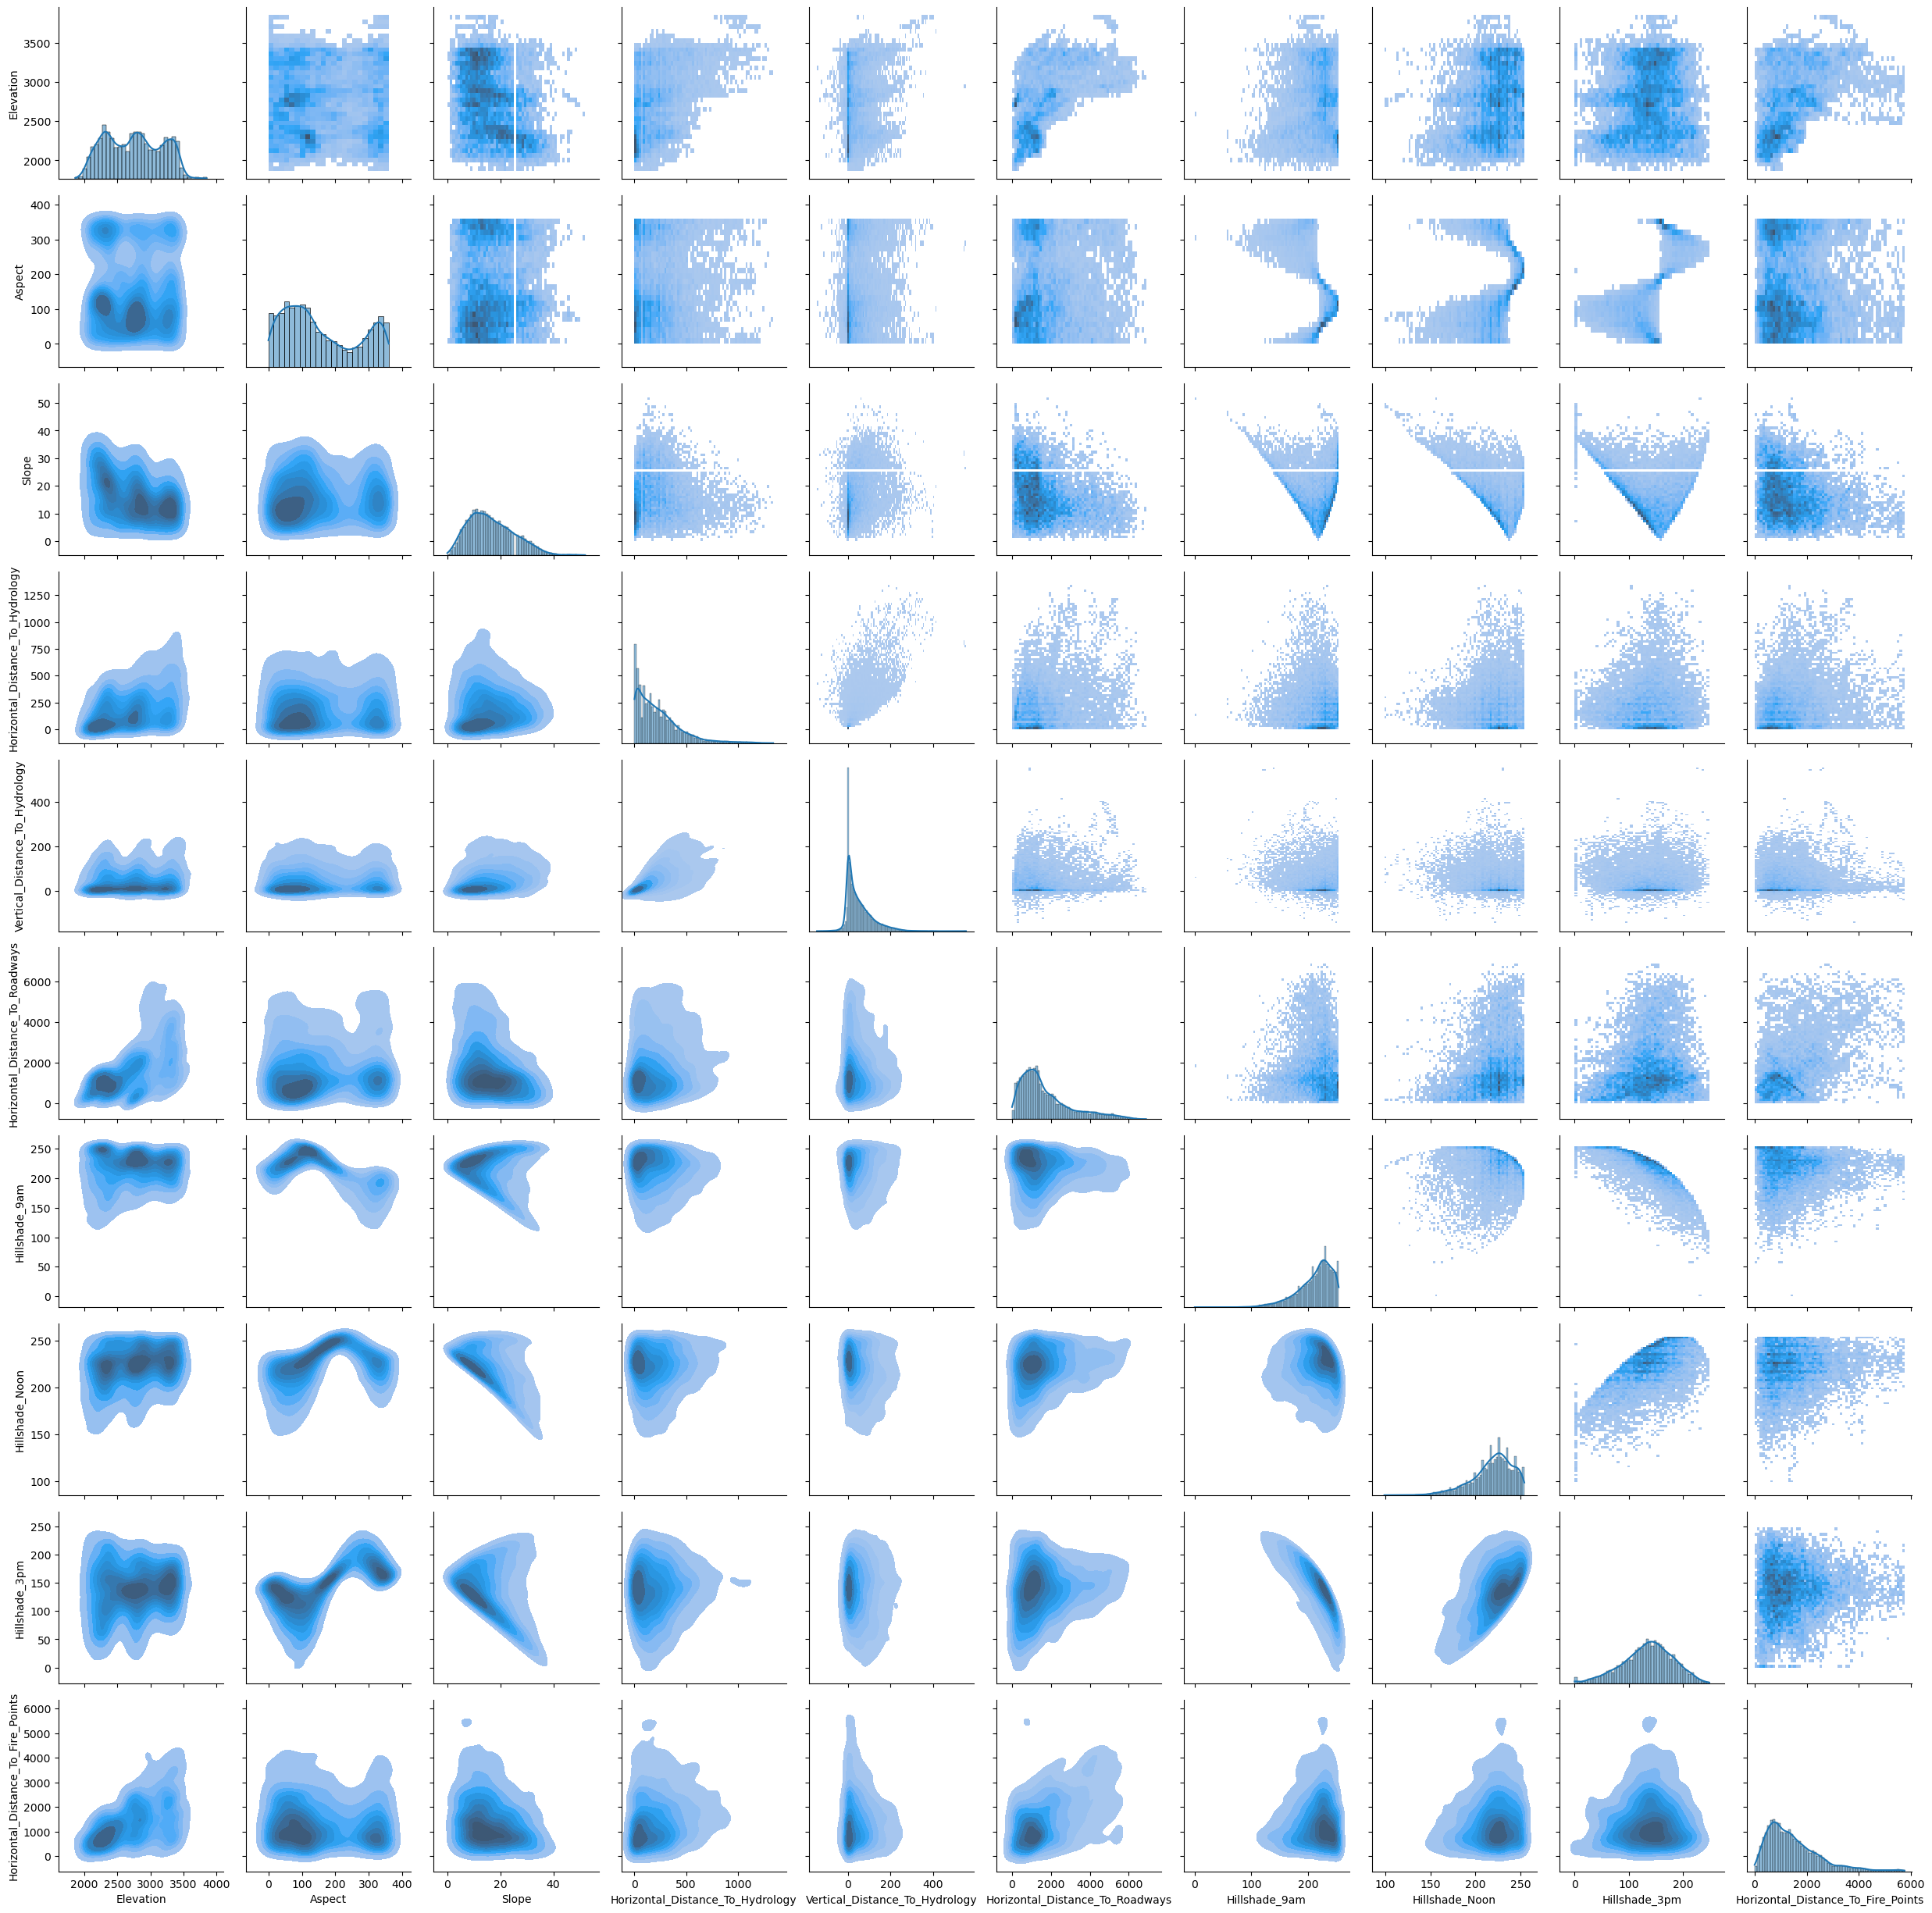

In [56]:
# Separating continuous columns in a new dataframe
cols_continuous = ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points']
A = train_mod[cols_continuous]

g = sns.PairGrid(A)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

In [59]:
# correlation matrix of the continuous columns in the train dataset
corr = A.corr()
corr

Elevation    Aspect     Slope  \
Elevation                            1.000000 -0.011338 -0.312662   
Aspect                              -0.011338  1.000000  0.027677   
Slope                               -0.312662  0.027677  1.000000   
Horizontal_Distance_To_Hydrology     0.413450  0.041574 -0.053417   
Vertical_Distance_To_Hydrology       0.122477  0.056411  0.264644   
Horizontal_Distance_To_Roadways      0.581406  0.065742 -0.274076   
Hillshade_9am                        0.097850 -0.594313 -0.200361   
Hillshade_Noon                       0.215250  0.326103 -0.611771   
Hillshade_3pm                        0.089154  0.635932 -0.325975   
Horizontal_Distance_To_Fire_Points   0.474472 -0.056117 -0.231772   

                                    Horizontal_Distance_To_Hydrology  \
Elevation                                                   0.413450   
Aspect                                                      0.041574   
Slope                                                      -0.053417   
Horizontal_Distance_To_Hydrology                            1.000000   
Vertical_Distance_To_Hydrology                              0.653912   
Horizontal_Distance_To_Roadways                             0.200158   
Hillshade_9am                                              -0.034234   
Hillshade_Noon                                              0.078453   
Hillshade_3pm                                               0.079978   
Horizontal_Distance_To_Fire_Points                          0.167349   

                                    Vertical_Distance_To_Hydrology  \
Elevation                                                 0.122477   
Aspect                                                    0.056411   
Slope                                                     0.264644   
Horizontal_Distance_To_Hydrology                          0.653912   
Vertical_Distance_To_Hydrology                            1.000000   
Horizontal_Distance_To_Roadways                           0.012621   
Hillshade_9am                                            -0.095629   
Hillshade_Noon                                           -0.132354   
Hillshade_3pm                                            -0.035340   
Horizontal_Distance_To_Fire_Points                       -0.005597   

                                    Horizontal_Distance_To_Roadways  \
Elevation                                                  0.581406   
Aspect                                                     0.065742   
Slope                                                     -0.274076   
Horizontal_Distance_To_Hydrology                           0.200158   
Vertical_Distance_To_Hydrology                             0.012621   
Horizontal_Distance_To_Roadways                            1.000000   
Hillshade_9am                                             -0.004804   
Hillshade_Noon                                             0.238946   
Hillshade_3pm                                              0.173622   
Horizontal_Distance_To_Fire_Points                         0.484523   

                                    Hillshade_9am  Hillshade_Noon  \
Elevation                                0.097850        0.215250   
Aspect                                  -0.594313        0.326103   
Slope                                   -0.200361       -0.611771   
Horizontal_Distance_To_Hydrology        -0.034234        0.078453   
Vertical_Distance_To_Hydrology          -0.095629       -0.132354   
Horizontal_Distance_To_Roadways         -0.004804        0.238946   
Hillshade_9am                            1.000000       -0.014331   
Hillshade_Noon                          -0.014331        1.000000   
Hillshade_3pm                           -0.780253        0.614653   
Horizontal_Distance_To_Fire_Points       0.076539        0.116902   

                                    Hillshade_3pm  \
Elevation                                0.089154   
Aspect                                   0.635932   
Slope      

**Distributions:**
* `Elevation`: Since the peaks are not prominent, we can consider the distribution as uniform;
* `Aspect`: It has two prominent peaks; So, we consider the distribution as bi-modal;
* `Slope`, `Horizontal_Distance_To_Hydrology`, `Vertical_Distance_To_Hydrology`, `Horizontal_Distance_To_Roadways`, `Horizontal_Distance_To_Fire_Points`: We can consider they have positively skewed gamma distributions.
* `Hillshade_9am`, `Hillshade_Noon`, `Hillshade_3pm`: We can consider they have negatively skewed beta distributions.
<br><br>

**Some relationships:**
* `Elevation` has the biggest positive linear relationship with `Horizontal_Distance_To_Roadways`, `Horizontal_Distance_To_Fire_Points`, and `Horizontal_Distance_To_Hydrology`.
* `Aspect` has the biggest positive linear relationship with `Hillshade_3pm` and `Hillshade_Noon`, while it has considerable negative relationship with `Hillshade_9am`. However, it sounds that this variable has a nonlinear relationship with `Hillshade_9am`, `Hillshade_Noon`, and `Hillshade_3pm`. 
* `Slope` has the biggest negative linear correlation with `Hillshade_Noon`.
* `Horizontal_Distance_To_Hydrology` has a considerable positive linear relationship with `Vertical_Distance_To_Hydrology`. 
* `Hillshade_9am` has a large negative linear correlation with `Hillshade_3pm`. 
* `Hillshade_Noon` has a considerable positive linear correlation with `Hillshade_3pm`. 
<br><br>

As can be seen, there is **a gap in the values of `Slope`**. This is due to the type of the variable (int) and the number of bins in the figure.
This can be seen in the following figure.

<AxesSubplot:xlabel='Slope', ylabel='Count'>

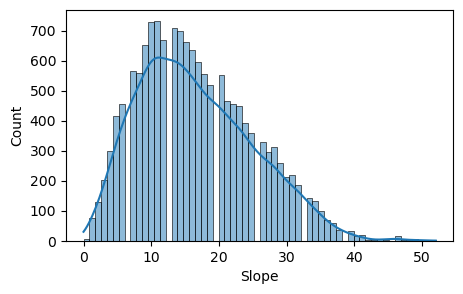

In [77]:
# histogram plot for 'Slope' column
fig, ax = plt.subplots(figsize=(5, 3))
sns.histplot(data=train_mod, x="Slope", bins=60, kde=True, ax=ax)

#### **3.5 Relationships between continuous variable and target:**<br>
We use some scatter plots to do so.

<AxesSubplot:xlabel='Elevation', ylabel='Horizontal_Distance_To_Fire_Points'>

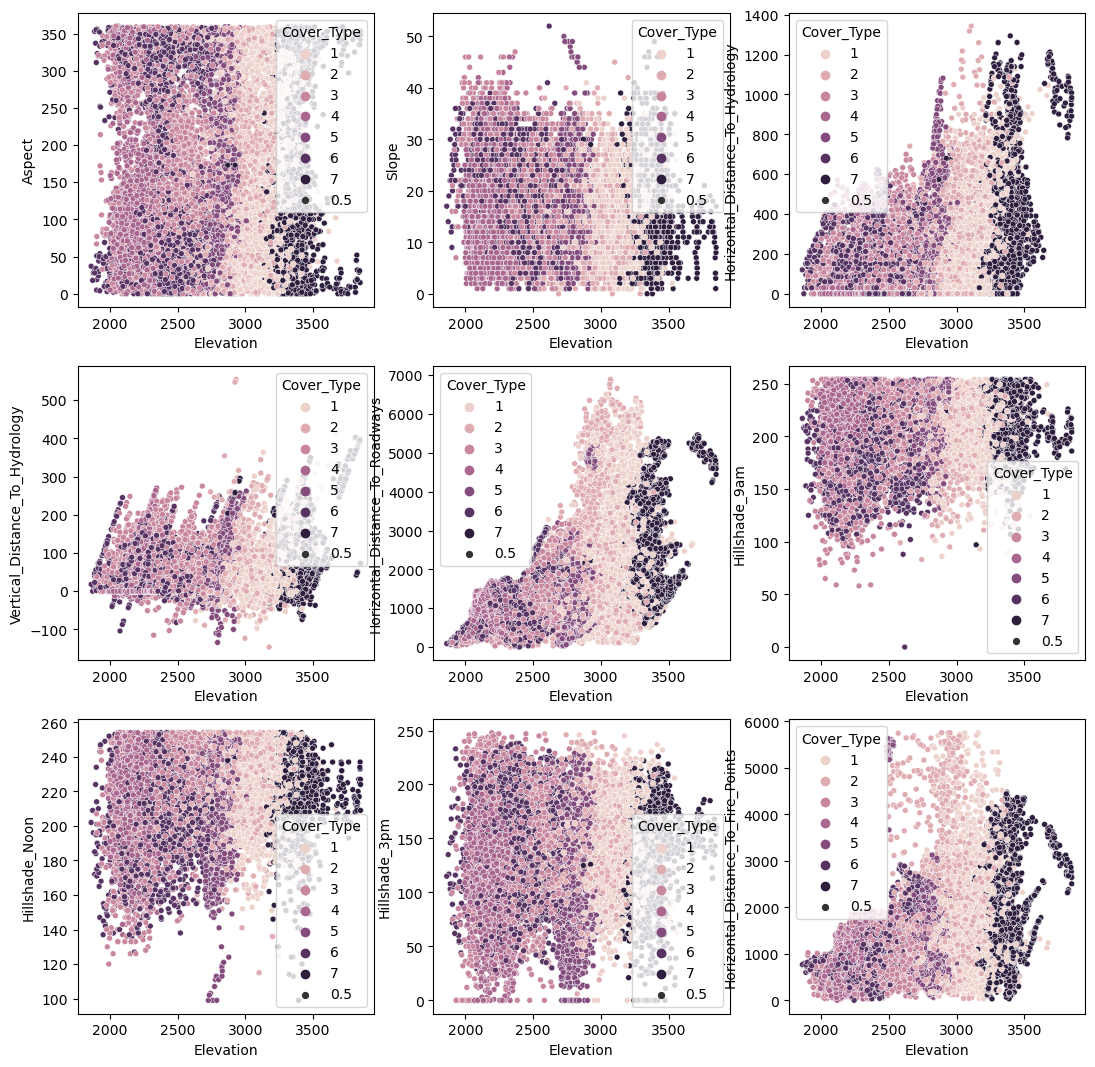

In [80]:
# scatter plots of 'Elevation' vs all other continuous columns with respect to the target variable
fig, ax = plt.subplots(3, 3, figsize=(13, 13))
sns.scatterplot(data=train_mod, x="Elevation", y="Aspect", hue="Cover_Type", ax=ax[0, 0], size=0.5)
sns.scatterplot(data=train_mod, x="Elevation", y="Slope", hue="Cover_Type", ax=ax[0, 1], size=0.5)
sns.scatterplot(data=train_mod, x="Elevation", y="Horizontal_Distance_To_Hydrology", hue="Cover_Type", ax=ax[0, 2], size=0.5)
sns.scatterplot(data=train_mod, x="Elevation", y="Vertical_Distance_To_Hydrology", hue="Cover_Type", ax=ax[1, 0], size=0.5)
sns.scatterplot(data=train_mod, x="Elevation", y="Horizontal_Distance_To_Roadways", hue="Cover_Type", ax=ax[1, 1], size=0.5)
sns.scatterplot(data=train_mod, x="Elevation", y="Hillshade_9am", hue="Cover_Type", ax=ax[1, 2], size=0.5)
sns.scatterplot(data=train_mod, x="Elevation", y="Hillshade_Noon", hue="Cover_Type", ax=ax[2, 0], size=0.5)
sns.scatterplot(data=train_mod, x="Elevation", y="Hillshade_3pm", hue="Cover_Type", ax=ax[2, 1], size=0.5)
sns.scatterplot(data=train_mod, x="Elevation", y="Horizontal_Distance_To_Fire_Points", hue="Cover_Type", ax=ax[2, 2], size=0.5)


**Note: As can be seen, `Elevation` can make a visible separation between different classes of the target. However, the other variables do not sound to be able to do that.** <br>

We investigate this by plotting other variables based on the target in the following.

<AxesSubplot:xlabel='Aspect', ylabel='Horizontal_Distance_To_Fire_Points'>

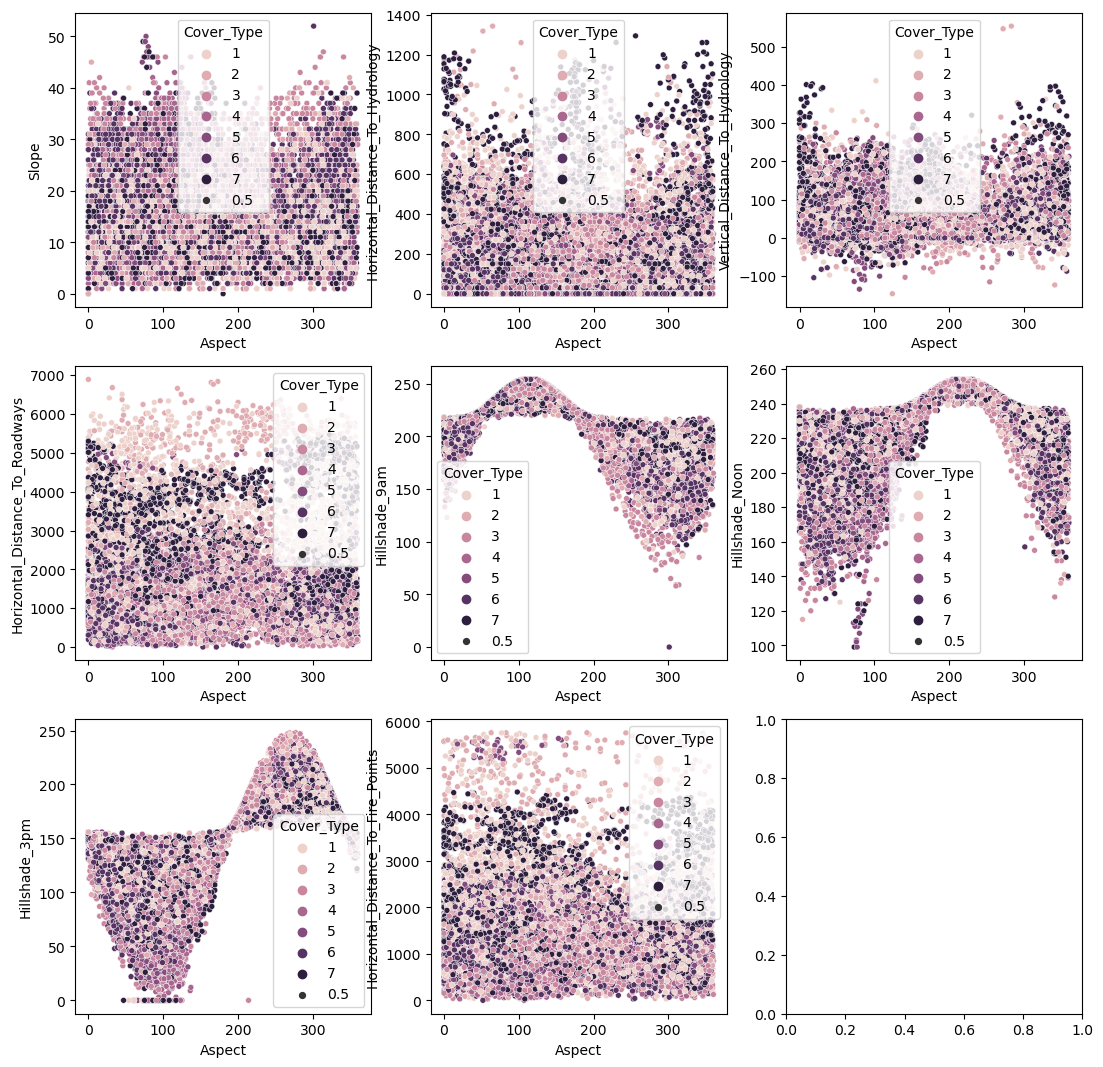

In [81]:
# scatter plots of 'Aspect' vs all other continuous columns (except 'Elevation') with respect to the target variable
fig, ax = plt.subplots(3, 3, figsize=(13, 13))
sns.scatterplot(data=train_mod, x="Aspect", y="Slope", hue="Cover_Type", ax=ax[0, 0], size=0.5)
sns.scatterplot(data=train_mod, x="Aspect", y="Horizontal_Distance_To_Hydrology", hue="Cover_Type", ax=ax[0, 1], size=0.5)
sns.scatterplot(data=train_mod, x="Aspect", y="Vertical_Distance_To_Hydrology", hue="Cover_Type", ax=ax[0, 2], size=0.5)
sns.scatterplot(data=train_mod, x="Aspect", y="Horizontal_Distance_To_Roadways", hue="Cover_Type", ax=ax[1, 0], size=0.5)
sns.scatterplot(data=train_mod, x="Aspect", y="Hillshade_9am", hue="Cover_Type", ax=ax[1, 1], size=0.5)
sns.scatterplot(data=train_mod, x="Aspect", y="Hillshade_Noon", hue="Cover_Type", ax=ax[1, 2], size=0.5)
sns.scatterplot(data=train_mod, x="Aspect", y="Hillshade_3pm", hue="Cover_Type", ax=ax[2, 0], size=0.5)
sns.scatterplot(data=train_mod, x="Aspect", y="Horizontal_Distance_To_Fire_Points", hue="Cover_Type", ax=ax[2, 1], size=0.5)


<AxesSubplot:xlabel='Slope', ylabel='Horizontal_Distance_To_Fire_Points'>

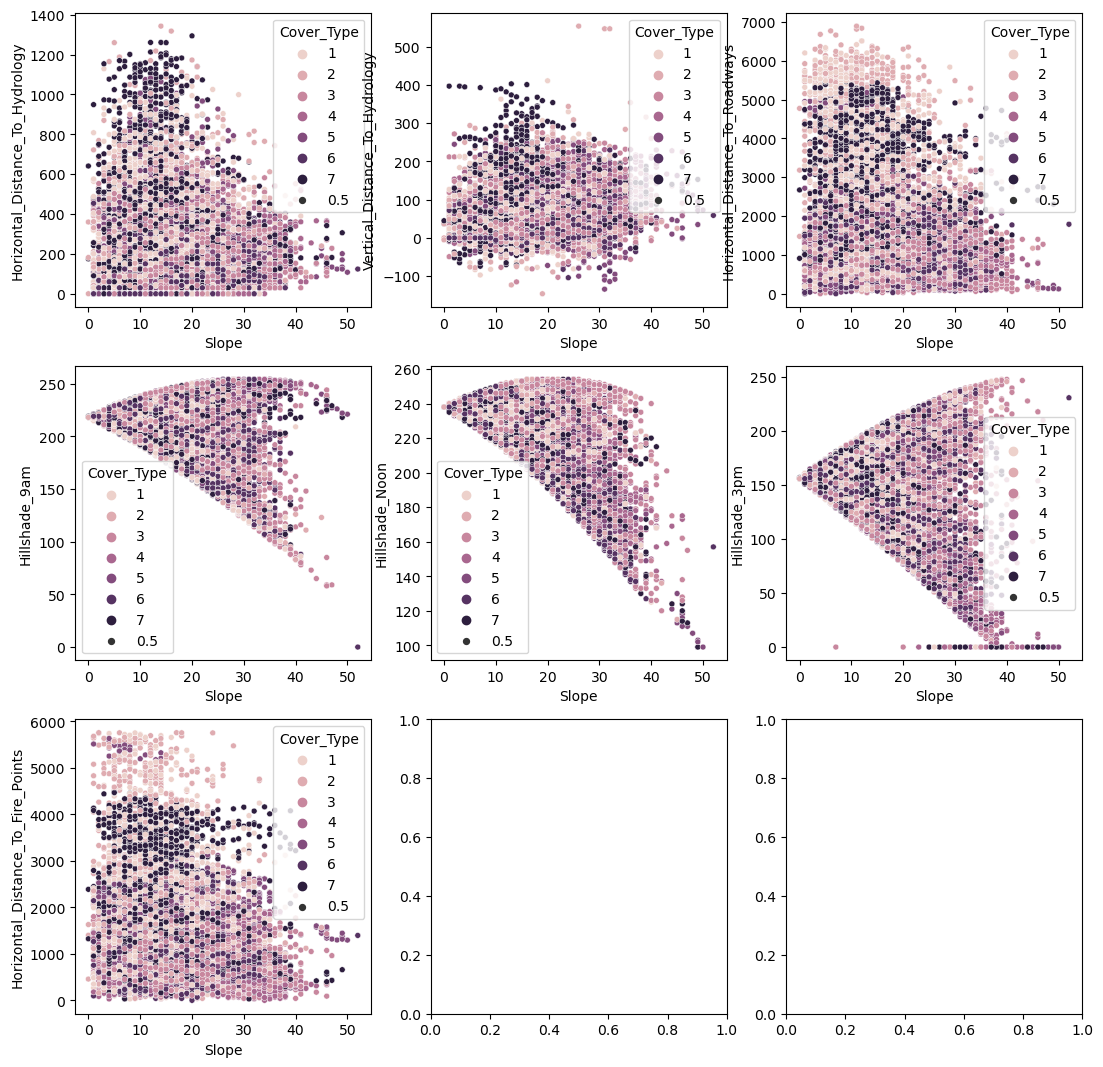

In [82]:
# scatter plots of 'Slope' vs all other continuous columns (except 'Elevation' and 'Aspect') with respect to the target variable
fig, ax = plt.subplots(3, 3, figsize=(13, 13))
sns.scatterplot(data=train_mod, x="Slope", y="Horizontal_Distance_To_Hydrology", hue="Cover_Type", ax=ax[0, 0], size=0.5)
sns.scatterplot(data=train_mod, x="Slope", y="Vertical_Distance_To_Hydrology", hue="Cover_Type", ax=ax[0, 1], size=0.5)
sns.scatterplot(data=train_mod, x="Slope", y="Horizontal_Distance_To_Roadways", hue="Cover_Type", ax=ax[0, 2], size=0.5)
sns.scatterplot(data=train_mod, x="Slope", y="Hillshade_9am", hue="Cover_Type", ax=ax[1, 0], size=0.5)
sns.scatterplot(data=train_mod, x="Slope", y="Hillshade_Noon", hue="Cover_Type", ax=ax[1, 1], size=0.5)
sns.scatterplot(data=train_mod, x="Slope", y="Hillshade_3pm", hue="Cover_Type", ax=ax[1, 2], size=0.5)
sns.scatterplot(data=train_mod, x="Slope", y="Horizontal_Distance_To_Fire_Points", hue="Cover_Type", ax=ax[2, 0], size=0.5)


#### **3.6 Linear Correlations with Target:**

In [94]:
# first converting Wilderness_Area to a column of type int (Wilderness_Area_code)
train_mod['Wilderness_Area_code'] = train_mod['Wilderness_Area'].str.replace('Wilderness_Area', '').astype(int)

# checking the number of each label in the train dataset for Soil_Type
train_mod['Wilderness_Area_code'].value_counts()

3    6349
4    4675
1    3465
2     499
Name: Wilderness_Area_code, dtype: int64

<AxesSubplot:>

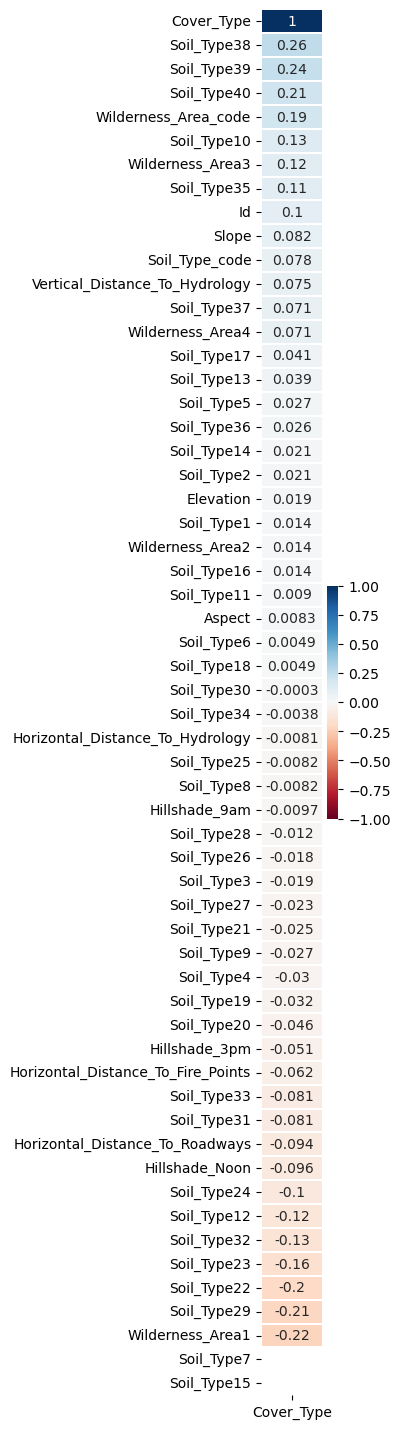

In [100]:
# linear correlations based on Pearson's correlation coefficient with target variable (heatmap)
fig, ax = plt.subplots(figsize=(1, 18))
sns.heatmap(train_mod.corr()[['Cover_Type']].sort_values(by='Cover_Type', ascending=False), annot=True, linewidths=0.1, vmax=1.0, vmin=-1, cmap=plt.cm.RdBu, linecolor='white', ax=ax)


As can be seen, the strongest positive and negative correlations with the target are 0.26 and -0.22, respectively. These values are very small and the linear relationships with target are not very significant. However, we have to consider that the target is not a continuous variable, but a multi-class variable with 1, 2, 3, ..., 7 as classes.

<AxesSubplot:>

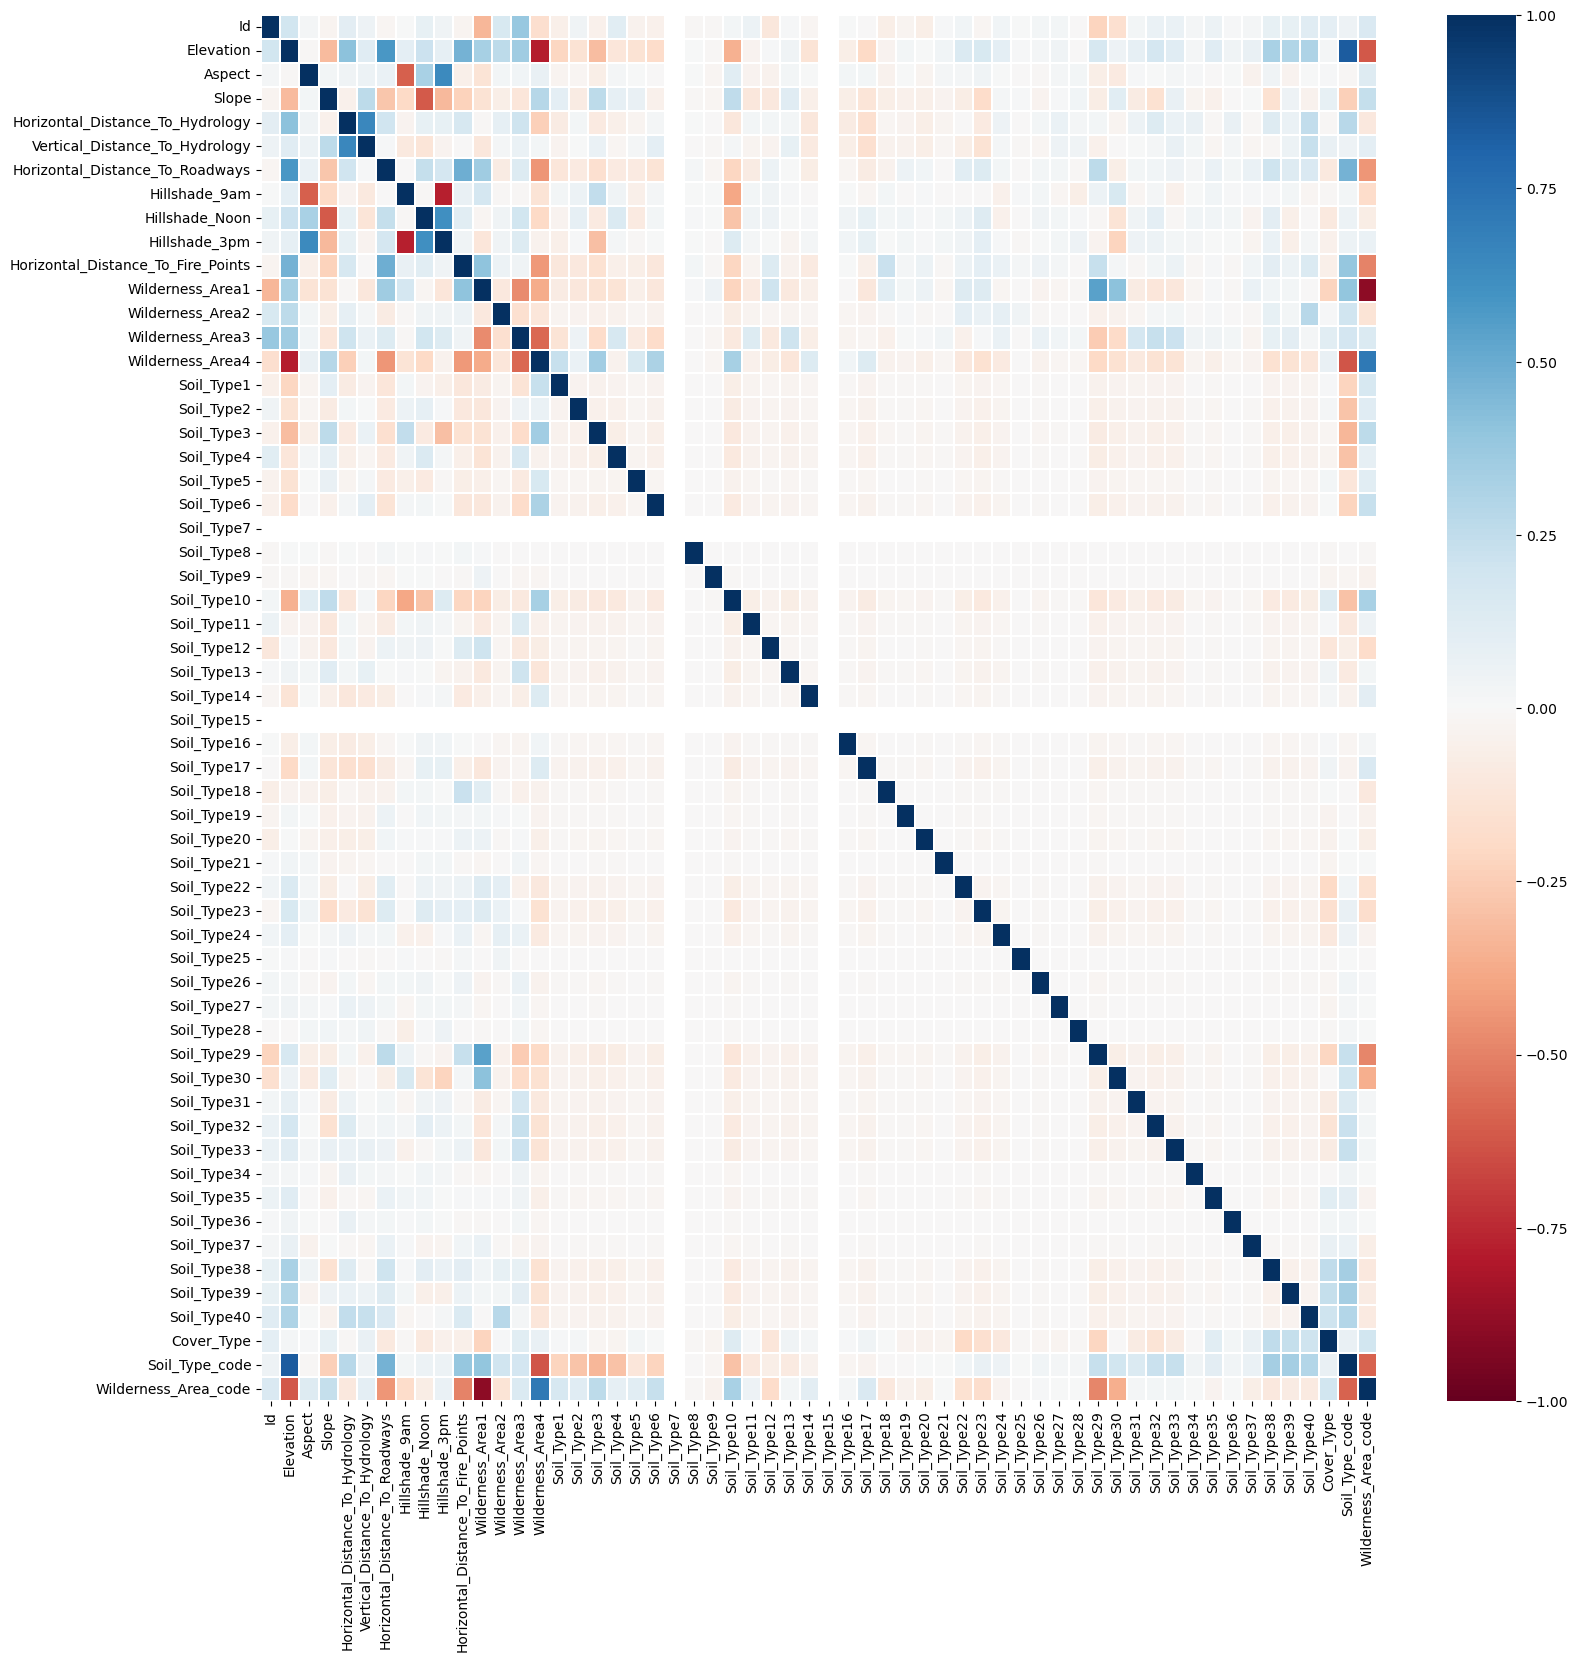

In [99]:
# correlation between all variables (heatmap)
fig, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(train_mod.corr(), annot=False, linewidths=0.1, vmax=1.0, vmin=-1, cmap=plt.cm.RdBu, linecolor='white', ax=ax)

Based on the above figure, most of the correlations are weak. <br>
We can also see that `Soil_Type7` and `Soil_Type15` are blank. So, we have to remove them later.   

#### **3.7 PP Scores:** <br>
**Predictive Power Score (PPS):** <br>
The PPS is an asymmetric, data-type-agnostic score that can detect linear or non-linear relationships between two columns. The score ranges from 0 (no predictive power) to 1 (perfect predictive power). It can be used as an alternative to the correlation (matrix)[1]. <br>

[1] https://pypi.org/project/ppscore/ <br>
More in: <br>
https://towardsdatascience.com/rip-correlation-introducing-the-predictive-power-score-3d90808b9598

In [110]:
# removing unnecessary columns
A = train_mod.copy().drop(columns=['Id', 'Wilderness_Area', 'Soil_Type', 'Soil_Type7', 'Soil_Type15'])
A['Cover_Type'] = A['Cover_Type'].astype('category')

# calculating the ppscore for each variable with respect to the target variable
scores = pps.matrix(A, cross_validation=4)
scores_target = scores[scores.y == 'Cover_Type']
scores_target.sort_values(by='ppscore', ascending=False)

x           y   ppscore  \
2912                          Cover_Type  Cover_Type  1.000000   
2967                      Soil_Type_code  Cover_Type  0.484049   
52                             Elevation  Cover_Type  0.383062   
327      Horizontal_Distance_To_Roadways  Cover_Type  0.110998   
217     Horizontal_Distance_To_Hydrology  Cover_Type  0.077031   
382                        Hillshade_9am  Cover_Type  0.072384   
272       Vertical_Distance_To_Hydrology  Cover_Type  0.071948   
3022                Wilderness_Area_code  Cover_Type  0.052341   
547   Horizontal_Distance_To_Fire_Points  Cover_Type  0.050550   
162                                Slope  Cover_Type  0.048365   
107                               Aspect  Cover_Type  0.044719   
492                        Hillshade_3pm  Cover_Type  0.025435   
437                       Hillshade_Noon  Cover_Type  0.011987   
2857                         Soil_Type40  Cover_Type  0.000000   
2802                         Soil_Type39  Cover_Type  0.000000   
1922                         Soil_Type23  Cover_Type  0.000000   
1977                         Soil_Type24  Cover_Type  0.000000   
2032                         Soil_Type25  Cover_Type  0.000000   
2087                         Soil_Type26  Cover_Type  0.000000   
2142                         Soil_Type27  Cover_Type  0.000000   
2197                         Soil_Type28  Cover_Type  0.000000   
2252                         Soil_Type29  Cover_Type  0.000000   
2307                         Soil_Type30  Cover_Type  0.000000   
2362                         Soil_Type31  Cover_Type  0.000000   
1867                         Soil_Type22  Cover_Type  0.000000   
2472                         Soil_Type33  Cover_Type  0.000000   
2527                         Soil_Type34  Cover_Type  0.000000   
2582                         Soil_Type35  Cover_Type  0.000000   
2637                         Soil_Type36  Cover_Type  0.000000   
2692                         Soil_Type37  Cover_Type  0.000000   
2747                         Soil_Type38  Cover_Type  0.000000   
2417                         Soil_Type32  Cover_Type  0.000000   
1757                         Soil_Type20  Cover_Type  0.000000   
1812                         Soil_Type21  Cover_Type  0.000000   
1702                         Soil_Type19  Cover_Type  0.000000   
602                     Wilderness_Area1  Cover_Type  0.000000   
657                     Wilderness_Area2  Cover_Type  0.000000   
712                     Wilderness_Area3  Cover_Type  0.000000   
767                     Wilderness_Area4  Cover_Type  0.000000   
822                           Soil_Type1  Cover_Type  0.000000   
877                           Soil_Type2  Cover_Type  0.000000   
932                           Soil_Type3  Cover_Type  0.000000   
987                           Soil_Type4  Cover_Type  0.000000   
1042                          Soil_Type5  Cover_Type  0.000000   
1097                          Soil_Type6  Cover_Type  0.000000   
1152                          Soil_Type8  Cover_Type  0.000000   
1207                          Soil_Type9  Cover_Type  0.000000   
1262                         Soil_Type10  Cover_Type  0.000000   
1317                         Soil_Type11  Cover_Type  0.000000   
1372                         Soil_Type12  Cover_Type  0.000000   
1427                         Soil_Type13  Cover_Type  0.000000   
1482                         Soil_Type14  Cover_Type  0.000000   
1592                         Soil_Type17  Cover_Type  0.000000   
1647                         Soil_Type18  Cover_Type  0.000000   
1537                         Soil_Type16  Cover_Type  0.000000   

                case  is_valid_score       metric  baseline_score  \
2912  predict_itself            True         None          0.0000   
2967  classification            True  weighted F1          0.1448   
52    classification            True  weighted F1          0.1448   
327   classification            True  weighted F1          0.1448 

Based on the results, `Soil_Type_code` and `Elevation` have the largest PPS with the values of 0.484049 and 0.383062, respectively. After them, PPS drops considerably for the other features. PPS for one hot encoded variables is 0. We should take into account that these variables are assessed individually. However, they together may have more power in predicting the target.

**Let's check PP scores for datasets separated based on `Wilderness_Area_code`. Considering the train and test sets, the goal is to develop models that can make prediction for each one of four wilderness areas. So, we have the option to develop four separate models if this approach can improve the prediction accuracy.**

In [128]:
# for area 1:
# removing unnecessary columns
A = train_mod[train_mod['Wilderness_Area_code'] == 1].copy().reset_index(drop=True)
A = A.drop(columns=['Id', 'Wilderness_Area', 'Soil_Type', 'Soil_Type7', 'Soil_Type15', 'Wilderness_Area_code'])
A['Cover_Type'] = A['Cover_Type'].astype('category')
A = pd.concat((A.iloc[:,:10], A[['Soil_Type_code', 'Cover_Type']]), axis=1)

# calculating the ppscore for each variable with respect to the target variable
scores = pps.matrix(A, cross_validation=4)
scores_target = scores[scores.y == 'Cover_Type']
scores_target.sort_values(by='ppscore', ascending=False)

x           y   ppscore            case  \
143                          Cover_Type  Cover_Type  1.000000  predict_itself   
131                      Soil_Type_code  Cover_Type  0.436741  classification   
11                            Elevation  Cover_Type  0.393868  classification   
71      Horizontal_Distance_To_Roadways  Cover_Type  0.210644  classification   
107                       Hillshade_3pm  Cover_Type  0.144253  classification   
95                       Hillshade_Noon  Cover_Type  0.115506  classification   
35                                Slope  Cover_Type  0.111972  classification   
83                        Hillshade_9am  Cover_Type  0.087128  classification   
23                               Aspect  Cover_Type  0.079981  classification   
47     Horizontal_Distance_To_Hydrology  Cover_Type  0.065608  classification   
119  Horizontal_Distance_To_Fire_Points  Cover_Type  0.044902  classification   
59       Vertical_Distance_To_Hydrology  Cover_Type  0.038719  classification   

     is_valid_score       metric  baseline_score  model_score  \
143            True         None         0.00000     1.000000   
131            True  weighted F1         0.27013     0.588894   
11             True  weighted F1         0.27013     0.557602   
71             True  weighted F1         0.27013     0.423873   
107            True  weighted F1         0.27013     0.375416   
95             True  weighted F1         0.27013     0.354434   
35             True  weighted F1         0.27013     0.351855   
83             True  weighted F1         0.27013     0.333722   
23             True  weighted F1         0.27013     0.328506   
47             True  weighted F1         0.27013     0.318015   
119            True  weighted F1         0.27013     0.302902   
59             True  weighted F1         0.27013     0.298390   

                        model  
143                      None  
131  DecisionTreeClassifier()  
11   DecisionTreeClassifier()  
71   DecisionTreeClassifier()  
107  DecisionTreeClassifier()  
95   DecisionTreeClassifier()  
35   DecisionTreeClassifier()  
83   DecisionTreeClassifier()  
23   DecisionTreeClassifier()  
47   DecisionTreeClassifier()  
119  DecisionTreeClassifier()  
59   DecisionTreeClassifier()

In [129]:
# for area 2:
# removing unnecessary columns
A = train_mod[train_mod['Wilderness_Area_code'] == 2].copy().reset_index(drop=True)
A = A.drop(columns=['Id', 'Wilderness_Area', 'Soil_Type', 'Soil_Type7', 'Soil_Type15', 'Wilderness_Area_code'])
A['Cover_Type'] = A['Cover_Type'].astype('category')
A = pd.concat((A.iloc[:,:10], A[['Soil_Type_code', 'Cover_Type']]), axis=1)

# calculating the ppscore for each variable with respect to the target variable
scores = pps.matrix(A, cross_validation=4)
scores_target = scores[scores.y == 'Cover_Type']
scores_target.sort_values(by='ppscore', ascending=False)

x           y   ppscore            case  \
143                          Cover_Type  Cover_Type  1.000000  predict_itself   
131                      Soil_Type_code  Cover_Type  0.527873  classification   
11                            Elevation  Cover_Type  0.427163  classification   
71      Horizontal_Distance_To_Roadways  Cover_Type  0.121394  classification   
119  Horizontal_Distance_To_Fire_Points  Cover_Type  0.105948  classification   
35                                Slope  Cover_Type  0.094523  classification   
95                       Hillshade_Noon  Cover_Type  0.041592  classification   
59       Vertical_Distance_To_Hydrology  Cover_Type  0.040192  classification   
23                               Aspect  Cover_Type  0.000000  classification   
47     Horizontal_Distance_To_Hydrology  Cover_Type  0.000000  classification   
83                        Hillshade_9am  Cover_Type  0.000000  classification   
107                       Hillshade_3pm  Cover_Type  0.000000  classification   

     is_valid_score       metric  baseline_score  model_score  \
143            True         None        0.000000     1.000000   
131            True  weighted F1        0.416834     0.724671   
11             True  weighted F1        0.416834     0.665941   
71             True  weighted F1        0.416834     0.487626   
119            True  weighted F1        0.416834     0.478619   
35             True  weighted F1        0.416834     0.471956   
95             True  weighted F1        0.416834     0.441089   
59             True  weighted F1        0.416834     0.440272   
23             True  weighted F1        0.416834     0.409159   
47             True  weighted F1        0.416834     0.380460   
83             True  weighted F1        0.416834     0.382268   
107            True  weighted F1        0.416834     0.380754   

                        model  
143                      None  
131  DecisionTreeClassifier()  
11   DecisionTreeClassifier()  
71   DecisionTreeClassifier()  
119  DecisionTreeClassifier()  
35   DecisionTreeClassifier()  
95   DecisionTreeClassifier()  
59   DecisionTreeClassifier()  
23   DecisionTreeClassifier()  
47   DecisionTreeClassifier()  
83   DecisionTreeClassifier()  
107  DecisionTreeClassifier()

In [130]:
# for area 3:
# removing unnecessary columns
A = train_mod[train_mod['Wilderness_Area_code'] == 3].copy().reset_index(drop=True)
A = A.drop(columns=['Id', 'Wilderness_Area', 'Soil_Type', 'Soil_Type7', 'Soil_Type15', 'Wilderness_Area_code'])
A['Cover_Type'] = A['Cover_Type'].astype('category')
A = pd.concat((A.iloc[:,:10], A[['Soil_Type_code', 'Cover_Type']]), axis=1)

# calculating the ppscore for each variable with respect to the target variable
scores = pps.matrix(A, cross_validation=4)
scores_target = scores[scores.y == 'Cover_Type']
scores_target.sort_values(by='ppscore', ascending=False)

x           y   ppscore            case  \
143                          Cover_Type  Cover_Type  1.000000  predict_itself   
131                      Soil_Type_code  Cover_Type  0.515872  classification   
11                            Elevation  Cover_Type  0.427951  classification   
71      Horizontal_Distance_To_Roadways  Cover_Type  0.105243  classification   
119  Horizontal_Distance_To_Fire_Points  Cover_Type  0.074126  classification   
23                               Aspect  Cover_Type  0.073796  classification   
95                       Hillshade_Noon  Cover_Type  0.063077  classification   
47     Horizontal_Distance_To_Hydrology  Cover_Type  0.046422  classification   
59       Vertical_Distance_To_Hydrology  Cover_Type  0.037722  classification   
83                        Hillshade_9am  Cover_Type  0.032260  classification   
35                                Slope  Cover_Type  0.031683  classification   
107                       Hillshade_3pm  Cover_Type  0.030376  classification   

     is_valid_score       metric  baseline_score  model_score  \
143            True         None          0.0000     1.000000   
131            True  weighted F1          0.1728     0.599530   
11             True  weighted F1          0.1728     0.526801   
71             True  weighted F1          0.1728     0.259857   
119            True  weighted F1          0.1728     0.234117   
23             True  weighted F1          0.1728     0.233844   
95             True  weighted F1          0.1728     0.224978   
47             True  weighted F1          0.1728     0.211200   
59             True  weighted F1          0.1728     0.204004   
83             True  weighted F1          0.1728     0.199485   
35             True  weighted F1          0.1728     0.199008   
107            True  weighted F1          0.1728     0.197927   

                        model  
143                      None  
131  DecisionTreeClassifier()  
11   DecisionTreeClassifier()  
71   DecisionTreeClassifier()  
119  DecisionTreeClassifier()  
23   DecisionTreeClassifier()  
95   DecisionTreeClassifier()  
47   DecisionTreeClassifier()  
59   DecisionTreeClassifier()  
83   DecisionTreeClassifier()  
35   DecisionTreeClassifier()  
107  DecisionTreeClassifier()

In [131]:
# for area 4:
# removing unnecessary columns
A = train_mod[train_mod['Wilderness_Area_code'] == 4].copy().reset_index(drop=True)
A = A.drop(columns=['Id', 'Wilderness_Area', 'Soil_Type', 'Soil_Type7', 'Soil_Type15', 'Wilderness_Area_code'])
A['Cover_Type'] = A['Cover_Type'].astype('category')
A = pd.concat((A.iloc[:,:10], A[['Soil_Type_code', 'Cover_Type']]), axis=1)

# calculating the ppscore for each variable with respect to the target variable
scores = pps.matrix(A, cross_validation=4)
scores_target = scores[scores.y == 'Cover_Type']
scores_target.sort_values(by='ppscore', ascending=False)

x           y   ppscore            case  \
143                          Cover_Type  Cover_Type  1.000000  predict_itself   
83                        Hillshade_9am  Cover_Type  0.293552  classification   
131                      Soil_Type_code  Cover_Type  0.263434  classification   
47     Horizontal_Distance_To_Hydrology  Cover_Type  0.252102  classification   
59       Vertical_Distance_To_Hydrology  Cover_Type  0.223623  classification   
23                               Aspect  Cover_Type  0.214282  classification   
11                            Elevation  Cover_Type  0.193464  classification   
107                       Hillshade_3pm  Cover_Type  0.134670  classification   
71      Horizontal_Distance_To_Roadways  Cover_Type  0.118965  classification   
119  Horizontal_Distance_To_Fire_Points  Cover_Type  0.037921  classification   
95                       Hillshade_Noon  Cover_Type  0.036208  classification   
35                                Slope  Cover_Type  0.026993  classification   

     is_valid_score       metric  baseline_score  model_score  \
143            True         None        0.000000     1.000000   
83             True  weighted F1        0.349947     0.540771   
131            True  weighted F1        0.349947     0.521193   
47             True  weighted F1        0.349947     0.513826   
59             True  weighted F1        0.349947     0.495314   
23             True  weighted F1        0.349947     0.489241   
11             True  weighted F1        0.349947     0.475708   
107            True  weighted F1        0.349947     0.437489   
71             True  weighted F1        0.349947     0.427280   
119            True  weighted F1        0.349947     0.374597   
95             True  weighted F1        0.349947     0.373484   
35             True  weighted F1        0.349947     0.367494   

                        model  
143                      None  
83   DecisionTreeClassifier()  
131  DecisionTreeClassifier()  
47   DecisionTreeClassifier()  
59   DecisionTreeClassifier()  
23   DecisionTreeClassifier()  
11   DecisionTreeClassifier()  
107  DecisionTreeClassifier()  
71   DecisionTreeClassifier()  
119  DecisionTreeClassifier()  
95   DecisionTreeClassifier()  
35   DecisionTreeClassifier()

Based on the above results, separating the datasets based on wilderness areas can improve the maximum PPS in some cases and change the importance of some features. It means that in a specific wilderness area, one feature may be more applicable in predicting cover type compared to another wilderness area.

## 4. Saving Modified data

First, we need to apply the same changes to the test set. It includes:
* Removing `Wilderness_Area` and `Soil_Type` since they are categorical, and removing `Soil_Type7` and `Soil_Type15` because they are empty in the train set. 
* Adding `Soil_Type_code` and `Wilderness_Area_code`.

In [139]:
test_mod = test.copy()

# converting one hot encoded Soil_Type to a single column of type int (Soil_Type_code)
test_mod['Soil_Type'] = (test_mod.iloc[:, 15:55] == 1).idxmax(1).values
test_mod['Soil_Type_code'] = test_mod['Soil_Type'].str.replace('Soil_Type', '').astype(int)

# converting one hot encoded Wilderness_Area to a single column of type int (Wilderness_Area_code)
test_mod['Wilderness_Area'] = (test_mod.iloc[:, 11:15] == 1).idxmax(1).values
test_mod['Wilderness_Area_code'] = test_mod['Wilderness_Area'].str.replace('Wilderness_Area', '').astype(int)

# removing unnecessary columns
test_mod = test_mod.drop(columns=['Wilderness_Area', 'Soil_Type', 'Soil_Type7', 'Soil_Type15'])
train_mod = train_mod.drop(columns=['Wilderness_Area', 'Soil_Type', 'Soil_Type7', 'Soil_Type15'])

Now, we save the datasets:

In [147]:
data_path = "data/processed/"

train_mod.to_csv(data_path + 'train.csv', index=False)
test_mod.to_csv(data_path + 'test.csv', index=False)